In [1]:
import matplotlib
import matplotlib.gridspec as gridspec
%matplotlib inline
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
def parabola(x):
    return x**2

x = np.linspace(-6, 6, 100)
y = parabola(x)

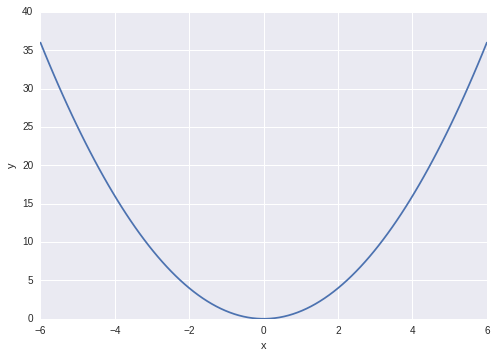

In [3]:
sns.plt.xlabel('x')
sns.plt.ylabel('y')
sns.plt.plot(x, y)

In [4]:
# Gradient descent to find min of y(x)=x^2
n_iter = 25 # number of iterations
lr = 0.1 # learning rate
x = 4.3 # our starting "guess" for x
savex = [x]
for i in range(n_iter):
   # dy/dx = 2*x
   x -= lr*(2*x)
   savex.append(x)

savex = np.array(savex)
savey = parabola(savex)

In [5]:
#fig, ax = sns.plt.subplots(1, 2, figsize=(12,3))

#sns.plt.ylabel('x')
#sns.plt.xlabel('Iteration')
#ax[0].set_xlabel('Iteration')
#ax[0].set_ylabel('x')
#ax[0].plot(savex)

#ax[1].set_xlabel('Iteration')
#ax[1].set_ylabel('y')
#ax[1].plot(savey)


In [6]:
#fig, ax = sns.plt.subplots(2, 1, figsize=(12,3))####

#sns.plt.ylabel('x')
#sns.plt.xlabel('Iteration')
#ax[0].set_xlabel('Iteration')
#ax[0].set_ylabel('x')
#ax[0].plot(savex)

#ax[1].set_xlabel('Iteration')
#ax[1].set_ylabel('y')
#ax[1].plot(savey)

Animating in browser...


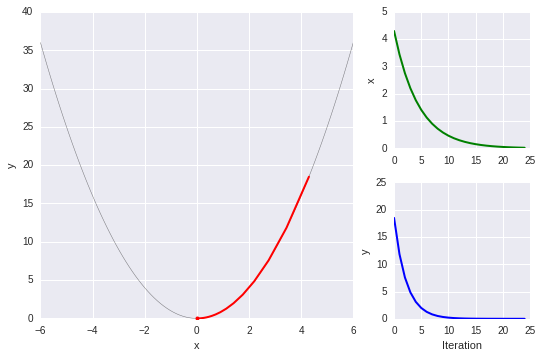

In [7]:
fig = sns.plt.figure()

gs2 = gridspec.GridSpec(2, 3)
gs2.update(left=0.1, right=0.95, hspace=0.25, wspace=0.3)
ax_fn= sns.plt.subplot(gs2[:, :-1])
ax_x = sns.plt.subplot(gs2[:-1, -1])
ax_y = sns.plt.subplot(gs2[-1, -1])

x = np.linspace(-6, 6, 100)
y = parabola(x)
line_fixed, = ax_fn.plot(x, y, lw=0.5, alpha=0.5, color='k')

line_fn, = ax_fn.plot([], [], lw=2, alpha=1.0, color='r')
spot_fn, = ax_fn.plot([], [], color='r', marker='o', markersize=4, linestyle='')
line_x, = ax_x.plot([], [], lw=2, alpha=1.0, color='g')
line_y, = ax_y.plot([], [], lw=2, alpha=1.0, color='b')

ax_fn.set_xlim(-6, 6)
ax_fn.set_ylim(-0.05, 40)
ax_x.set_xlim(0, 25)
ax_x.set_ylim(0, 5)
ax_y.set_xlim(0, 25)
ax_y.set_ylim(0, 25)

ax_fn.set_xlabel('x')
ax_fn.set_ylabel('y')
ax_y.set_xlabel('Iteration')
ax_y.set_ylabel('y')
ax_x.set_ylabel('x')

# initialization function: plot the background of each frame
def init():
    line_fn.set_data([], [])
    spot_fn.set_data([], [])
    line_x.set_data([], [])
    line_y.set_data([], [])
    return [line_fn, line_x, line_y]

# animation function.  This is called sequentially
def animate(t):
    line_x.set_data(np.arange(0, t), savex[0:t])
    line_y.set_data(np.arange(0, t), parabola(savex[0:t]))
    line_fn.set_data(savex[0:t+1], parabola(savex[0:t+1]))
    spot_fn.set_data(savex[t], parabola(savex[t]))
    return [line_fn, line_x, line_y]

# call the animator. 
anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=range(len(savex[0:26])), 
                               interval=100, blit=True)

mywriter = animation.FFMpegWriter(fps=15, extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
#anim.save('./gradient_descent.mp4', writer=mywriter)
anim.save('./gradient_descent.gif', dpi=180, writer='imagemagick')
print 'Animating in browser...'
HTML(anim.to_html5_video())

(-1, 300)

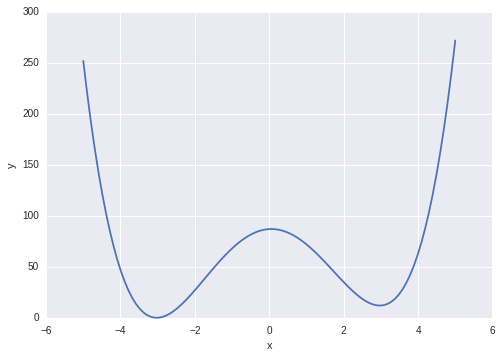

In [8]:
def double_well(x, l=1, f=3):
    return l*(x**2 - f**2)**2 + 2*x + 6 

x = np.linspace(-5, 5, 100)
y = double_well(x)
sns.plt.plot(x, y)
sns.plt.ylabel('y')
sns.plt.xlabel('x')
sns.plt.ylim((-1, 300))

In [9]:
saved_xpaths = []
saved_ypaths = []
last_x = 0.
for j in range(20):
  # Gradient descent to find min of double well
  n_iter = 25 # number of iterations
  lr = 0.003 # learning rate
  x = (np.random.random()-0.5)*2.*5. # our starting "guess" for x
  # avoid trivial or similar paths...
  if np.abs(last_x - x) < 0.2: continue
  if np.abs(x - 3.) < 0.5: continue
  if np.abs(x + 3.) < 0.5: continue
  last_x = x
  savex = [x]
  for i in range(n_iter):
     # dy/dx = 4*x*(x**2 - 9) + 2
     x -= lr*(4*x*(x**2 - 9) + 2)
     savex.append(x)
  savex = np.array(savex)
  savey = double_well(savex)
  saved_xpaths.append(savex)
  saved_ypaths.append(savey)

print len(saved_xpaths)

15


Animating in browser...


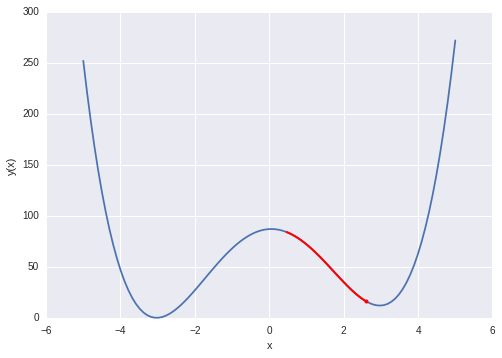

In [10]:
# First set up the figure, the axis, and the plot element we want to animate
fig = sns.plt.figure()

ax = sns.plt.axes(xlim=(-6, 6), ylim=(-1, 300))
ax.set_xlabel('x')
ax.set_ylabel('y(x)')

x = np.linspace(-5, 5, 100)
y = double_well(x)
line_fixed, = ax.plot(x, y)

gd, = ax.plot([], [], lw=2, color='r')
spot, = ax.plot([], [], color='r', marker='o', markersize=4, linestyle='')

# initialization function: plot the background of each frame
def init():
    gd.set_data([], [])
    spot.set_data([], [])
    return [gd, spot]

# animation function.  This is called sequentially
def animate(t):
    i = int(t / n_iter)
    j = t % n_iter
    gd.set_data(saved_xpaths[i][0:j+1], saved_ypaths[i][0:j+1])
    spot.set_data(saved_xpaths[i][j], saved_ypaths[i][j])
    return [gd, spot]

# call the animator. 
anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=range(n_iter*len(saved_xpaths)), 
                               interval=70, blit=True)
sns.plt.grid(True)

mywriter = animation.FFMpegWriter(fps=15, extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
#anim.save('/home/erlend/temp/hmc_phase_space.mp4', writer=mywriter)
anim.save('./gradient_descent_quartic.gif', dpi=72, writer='imagemagick')
print 'Animating in browser...'
HTML(anim.to_html5_video())